# Análise Exploratória de Dados

In [1]:

import numpy as np
import pandas as pd
#graficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import squarify
import seaborn as sns
#estat
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import linear_reset
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import pickle

In [2]:
df = pd.read_csv("C:/Users/SAMSUNG/OneDrive/Documentos/GitHub/vendas_carros/dados/df_clean.csv")

In [3]:
df.shape

(356266, 15)

In [4]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
1,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al
2,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al
3,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al
4,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al


# Análise Gráfica

Nessa primeira fase do processo, busco analisar através de gráficos como se dá a distribuição do dataset e alguns dados sobre ele através de gráficos de barra, tree maps e gráficos de dispersão.  O objetivo aqui é encontrar possíveis padrões que possam ajudar a melhorar o modelo matemático utilziado para a análise econômetrica e preditiva.

In [4]:
mpl.rcParams.update(mpl.rcParamsDefault)


In [41]:
#Funções dos gráficos
plt.style.use('ggplot')

#grafico de barras horizontal
def plot_barh(data, title):
    plt.figure(figsize=(10,6))
    plt.barh(data.index, data.values, color=['#5e548e'])
    plt.title(title, size=14, weight='bold')
    plt.xticks([])
    plt.gca().invert_yaxis()

    rects = plt.gca().patches
    for rect in rects:
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2
        space = -45
        ha = 'left'
        if x_value < 0:
            space *= -1
            ha = 'right'
        label = "{:.0f}".format(x_value)
        plt.annotate(
            label,
            (x_value, y_value),
            xytext=(space, 0),
            textcoords="offset points",
            va='center',
            ha=ha,
            color='white',
            weight='bold',
            size=12)

    plt.show()

# tree map
def plot_treemap(data, title):
    
    sizes = data.values
    labels = data.index
    sizes_perc = sizes / sum(sizes)

    colors = ['#231942', '#3a7ca5', '#00a896', '#be95c4', '#81c3d7', '#0a2472']

    plt.figure(figsize=(8, 6))
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)

    ax = plt.gca()

    for i, (label, size, perc) in enumerate(zip(labels, sizes, sizes_perc)):
        x, y, dx, dy = ax.patches[i].get_x(), ax.patches[i].get_y(), ax.patches[i].get_width(), ax.patches[i].get_height()
        plt.text(x + dx / 2, y + dy / 2 - 5, f'{size}', fontsize=10, ha='center', va='center', color='white', weight='bold')
        plt.text(x + dx / 2, y + dy / 2 - 8, f'({perc:.2%})', fontsize=8, ha='center', va='center', color='white')

    plt.axis('off')
    plt.title(title)
    plt.show()

#grafico de dispersão
def scatterplot(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, c='#5e548e', alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


#histograma com kde
def plot_histogram_kde(data, title, xlabel, ylabel, color):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    


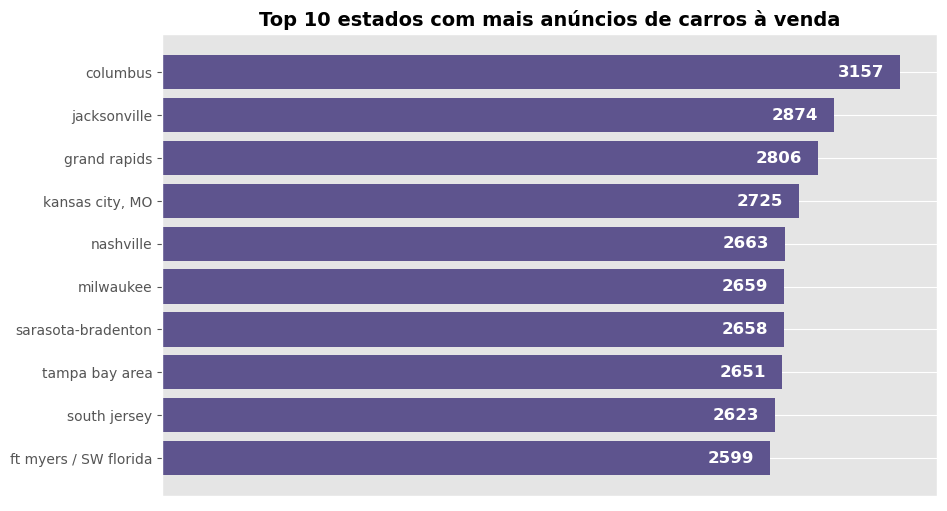

In [6]:
region_p = df['region'].value_counts()[0:10]
plot_barh(region_p, 'Top 10 estados com mais anúncios de carros à venda')

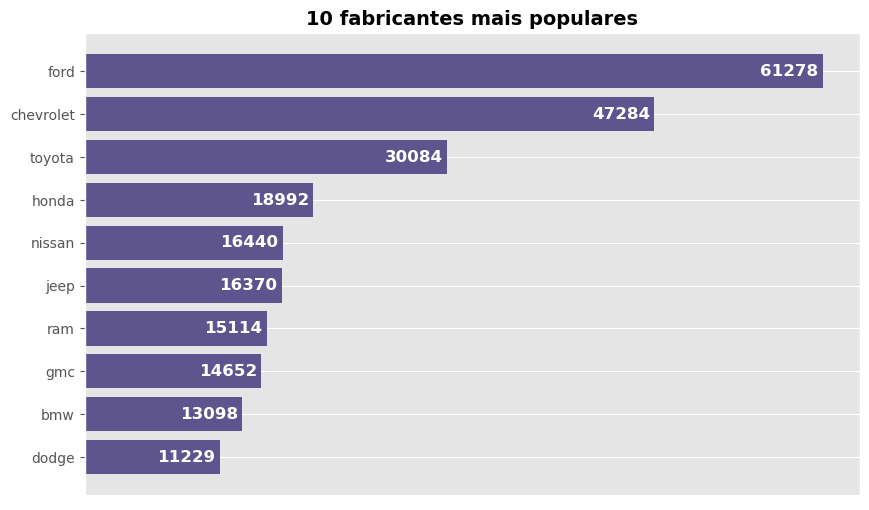

In [7]:
manufactures_p = df['manufacturer'].value_counts()[0:10]
plot_barh(manufactures_p, '10 fabricantes mais populares')

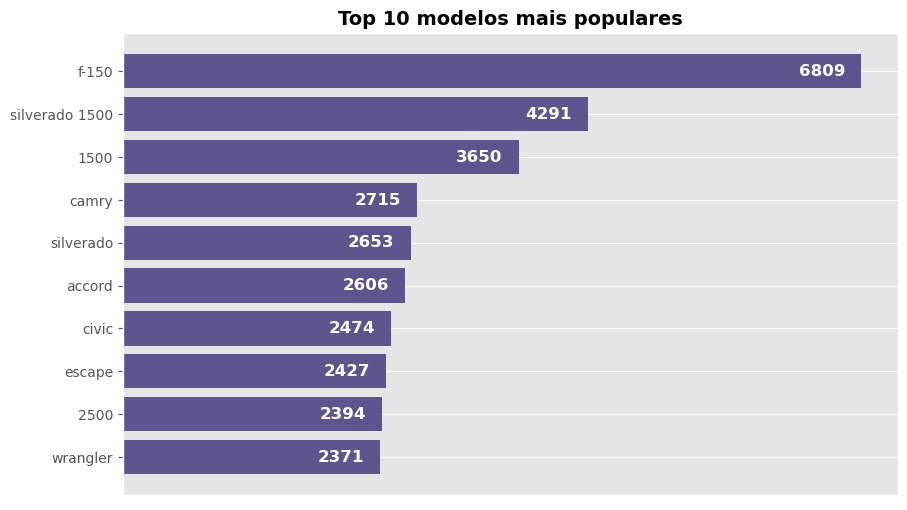

In [8]:
model_p = df['model'].value_counts()[0:10]
plot_barh(model_p, 'Top 10 modelos mais populares')

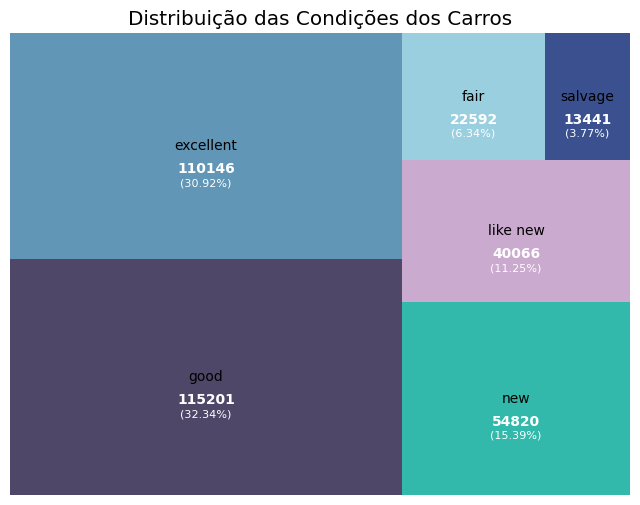

In [11]:
condition_counts = df['condition'].value_counts()
plot_treemap(condition_counts, 'Distribuição das Condições dos Carros')


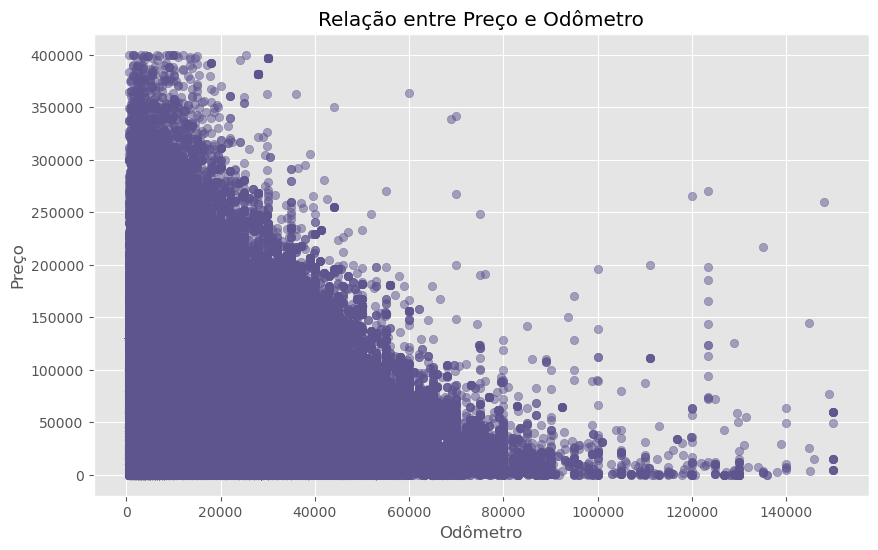

In [12]:
scatterplot(df['price'], df['odometer'], 'Relação entre Preço e Odômetro', 'Odômetro', 'Preço')

- Parece que, em nível, odômetro está negativamente relacionado com preço: quanto maior o número do odômetro, menor o preço.

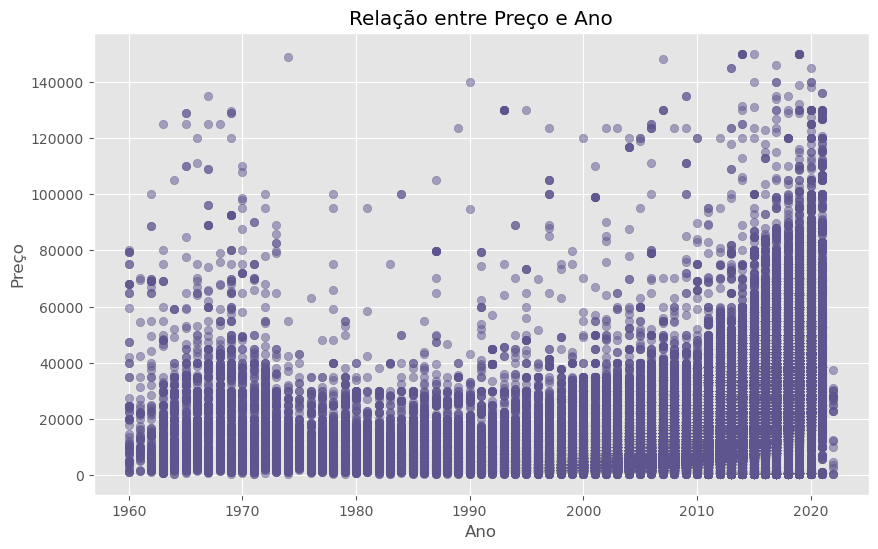

In [13]:
scatterplot( df['year'],df['price'], 'Relação entre Preço e Ano', 'Ano', 'Preço')

- Parece que carros mais novos são mais caros, apesar de haver uma série de outliers.

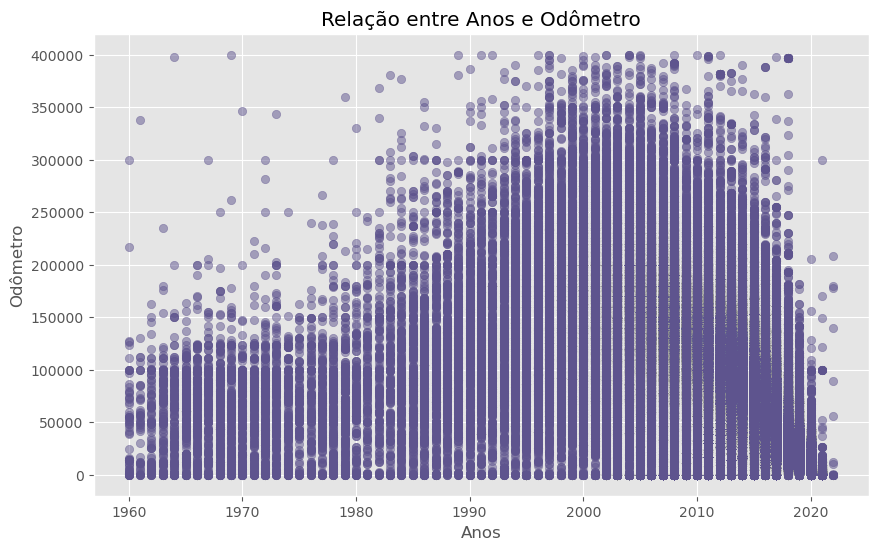

In [23]:
scatterplot(df['year'], df['odometer'], 'Relação entre Anos e Odômetro',  'Anos', 'Odômetro')

- Carros entre 2000-2015 tem maior número de odômetros enquanto carros mais velhos tem uma kilometragem menor. O senso comum sugere o contrário, que quanto mais velho o carro maior seja o odômetro. Mas talvez isso seja apenas um viés no dataset: os carros mais velhos do que 2000 ainda estão sendo vendidos em carros usados justamente por serem mais conservados.

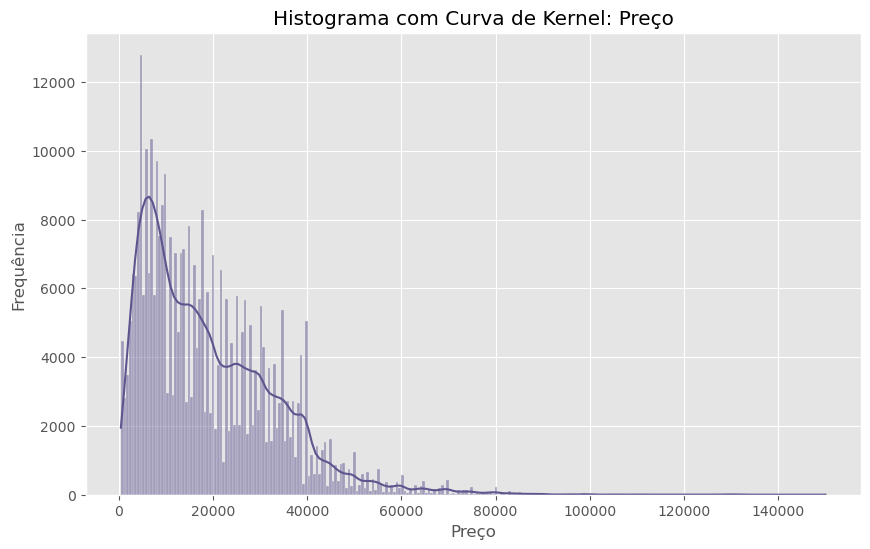

In [15]:
plot_histogram_kde(df['price'], 'Histograma com Curva de Kernel: Preço', 'Preço', 'Frequência', '#5e548e')


Distriuição assimétrica, com longa causa mesmo retirando boa parte dos outliers.

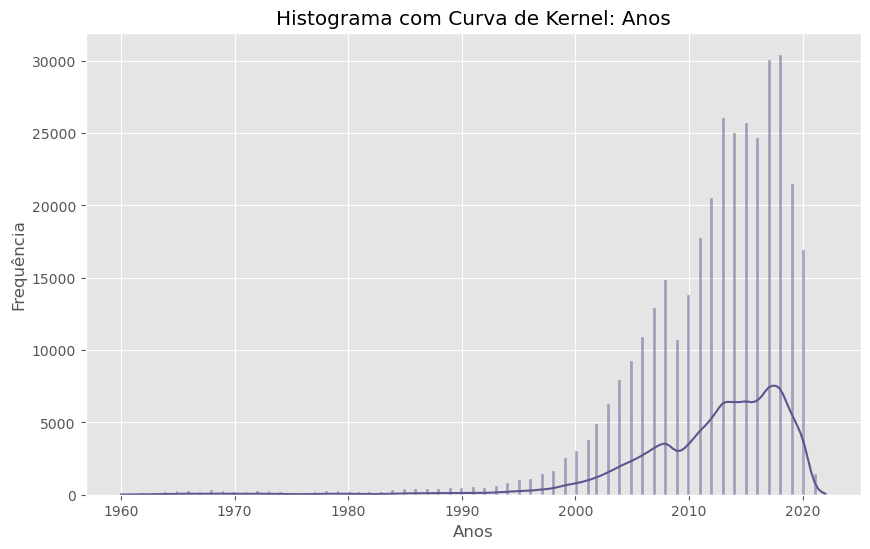

In [16]:
plot_histogram_kde(df['year'], 'Histograma com Curva de Kernel: Anos', 'Anos', 'Frequência', '#5e548e')


Boa parte dos carros comercializados tem até 4 anos.

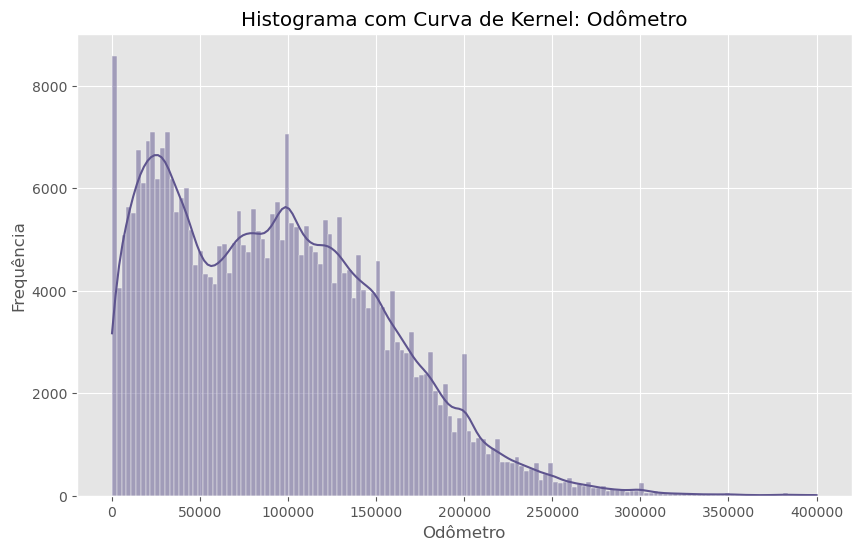

In [17]:
plot_histogram_kde(df['odometer'], 'Histograma com Curva de Kernel: Odômetro', 'Odômetro', 'Frequência', '#5e548e')


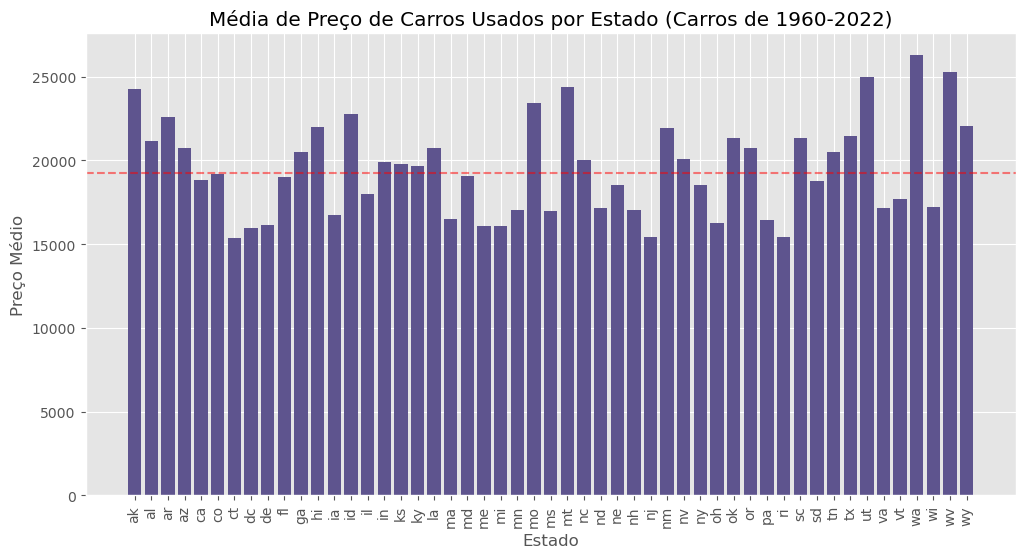

In [18]:
# Filtrar os registros entre 1960 e 2022
filtered_df = df[(df['year'] >= 1960) & (df['year'] <= 2022)]

# Calcular a média do preço dos carros usados para cada estado
average_price_by_state = filtered_df.groupby('state')['price'].mean()

#Média do dataset
mean_price = df['price'].mean()

# Criar um gráfico de barras com a média de preço para cada estado
plt.figure(figsize=(12, 6))
plt.bar(average_price_by_state.index, average_price_by_state.values, color='#5e548e')
plt.title('Média de Preço de Carros Usados por Estado (Carros de 1960-2022)')
plt.axhline(mean_price, color='red', linestyle='--', label='Média', alpha =  0.5)
plt.xlabel('Estado')
plt.ylabel('Preço Médio')
plt.xticks(rotation=90)
plt.show()

# Medidas de tendência central e dispersão

In [25]:
df.describe()

,price,year,odometer
count,356266.00000,356266.000000,356266.000000
mean,19233.94375,2011.684797,92983.460414
std,14435.68608,7.638730,62826.655764
min,500.00000,1960.000000,1.000000
25%,7900.00000,2008.000000,38995.000000
50%,15990.00000,2013.000000,88000.000000
75%,27990.00000,2017.000000,135645.250000
max,149998.00000,2022.000000,400000.000000


In [20]:
df.describe(include='object').T

,count,unique,top,freq
region,356266,404,columbus,3157
manufacturer,356266,41,ford,61278
model,356266,20812,f-150,6809
condition,356266,6,good,115201
cylinders,356266,8,6 cylinders,225885
fuel,356266,5,gas,302581
title_status,356266,6,clean,338628
transmission,356266,3,automatic,278985
drive,356266,3,4wd,155546
type,356266,13,other,92344


In [36]:
pd.pivot_table(df, values=['price', 'odometer', 'fuel', 'paint_color', 'year'], index = 'condition', aggfunc={
     'odometer': 'mean', 'paint_color': lambda x: x.value_counts().index[0], 'fuel': lambda x: x.value_counts().index[0], 'price': 'mean',
     'year': lambda x: x.value_counts().index[0]
})

,fuel,odometer,paint_color,price,year
condition,,,,,
excellent,gas,110859.908258,white,15286.973199,2013.0
fair,gas,192387.356277,white,8863.457109,2007.0
good,gas,76179.343139,white,21312.202837,2018.0
like new,gas,88597.615859,white,18648.255878,2015.0
new,gas,40040.062678,white,29181.179606,2018.0
salvage,gas,152441.788409,white,12372.417677,2008.0


Na tabela acima temos a média de odomêtro e preço de acordo com a condição do carro. Além disso, temos a moda do fuel, a cor e o ano.
Assim, temos que a maioria dos carros salvage são de 2018 e a maioria dos carros considerados novos são de 2018. 

# Linearizando as variáveis para inferência

O principal objetivo da transformação das variáveis é tornar linear uma relação não linear, embora existam outros motivos, por exemplo, a obtenção de uma distribuição normal, aliviar problemas de heterocesticidade e obter estimativas menos sensíveis a outliers. O pressuposto da linearidade  é o alicerce do modelo de regressão clássica.
O uso de logarítimos é um dos principais instrumentos matemáticos utilizados na modelagem estatística. A utilização do logaritmo natural é preferida nesse caso, em razão de uma propriedade interessante do logaritmo natural: pequenas variações no logaritmo natural representam variações percentuais na variável em análise.
Normalmente, utiliza-se o logaritmo para variáveis expressas em valores monetários positivos e grandes valores inteiros que sejam positivos e diferentes de zero. É justamente isso que faremos aqui.

In [37]:
# Criar a nova coluna com o ln do preço
df['ln_price'] = np.log(df['price'])

# Criar a nova coluna com o ln do odometro
df['ln_odometer'] = np.log(df['odometer'])

In [22]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,ln_price,ln_odometer
0,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,9.615805,11.759786
1,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al,10.239603,11.137446
2,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al,10.451320,10.292112
3,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al,10.463103,10.668955
4,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al,10.308619,9.758577


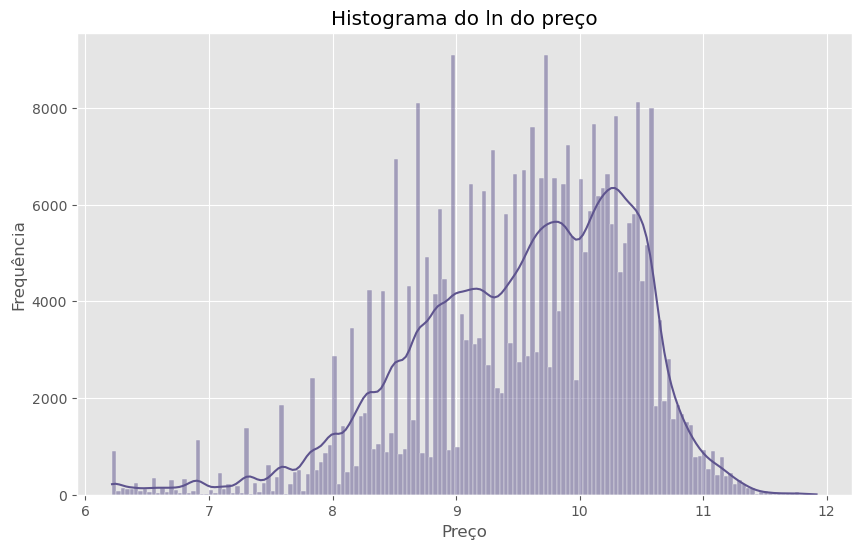

In [38]:
plot_histogram_kde(df['ln_price'], 'Histograma do ln do preço', 'Preço', 'Frequência', '#5e548e')

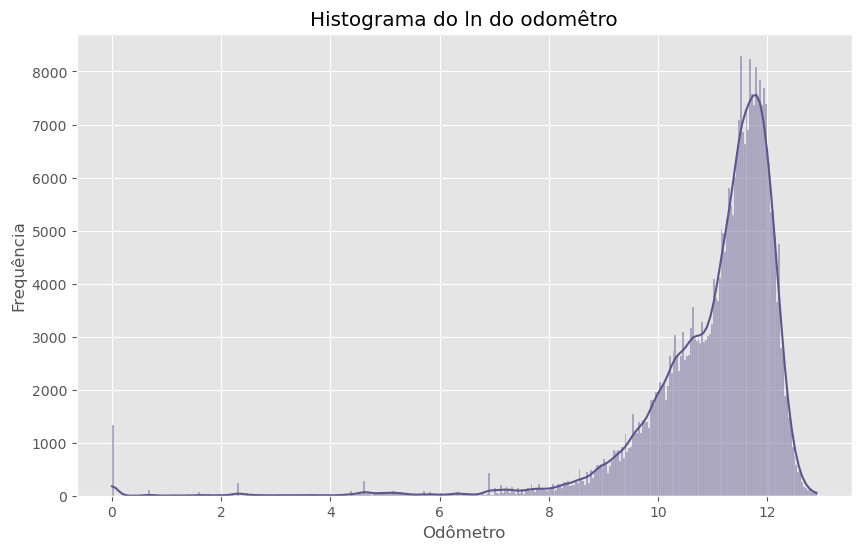

In [24]:
plot_histogram_kde(df['ln_odometer'], 'Histograma do ln do odomêtro', 'Odômetro', 'Frequência', '#5e548e')

- As variáveis em ln estão bem mais próximas da normalidade dos dados.

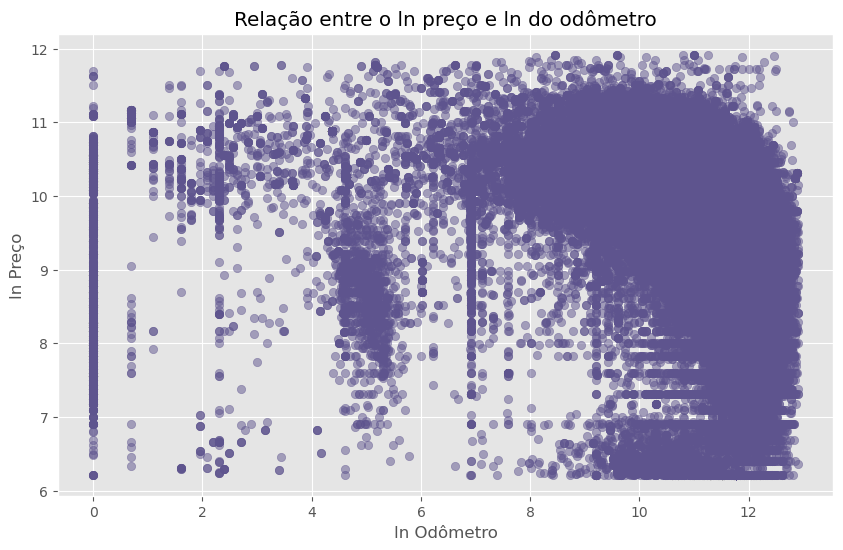

In [43]:
scatterplot( df['ln_odometer'], df['ln_price'],'Relação entre o ln preço e ln do odômetro',   'ln Odômetro', 'ln Preço',)

- Tudo indica que não há relação nenhuma entre as duas variáveis em log-log

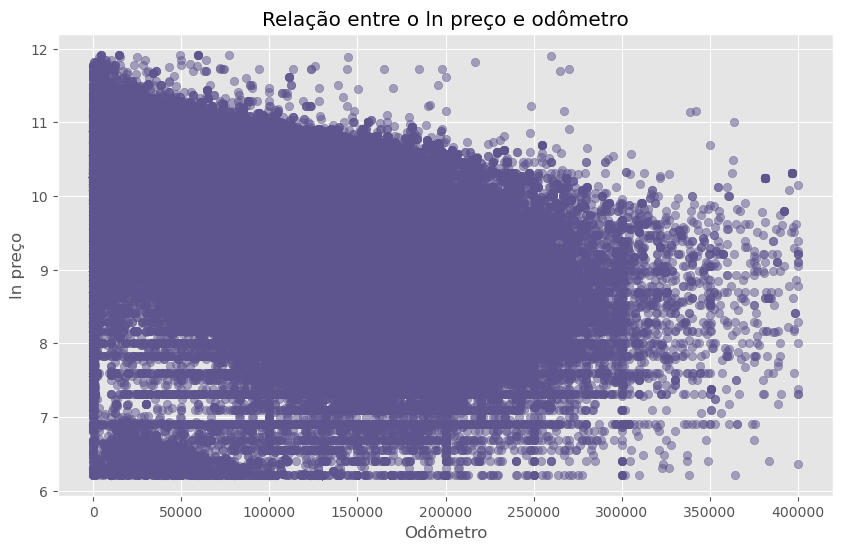

In [44]:
scatterplot(df['odometer'], df['ln_price'], 'Relação entre o ln preço e odômetro',  'Odômetro', 'ln preço')

No log-nivel parece seguir uma função afim.

# Testes de normalidade

A relevância dos testes de normalidade reside no fato que algumas estratégia estatisticas são baseados no pressuposto de normalidade. Esse é o caso da regressão linear por mínimos quadrados ordinários.
Iremos utilizar dois testes:
- Estatística de Jarque-Bera: teste de normalidade dos dados que incorpora simultaneamente os conceitos de assimetria e curtose. Apresenta a distribuição Qui-Quadrado e, sempre que o valor de sua probabilidade for inferior a 0,05 rejeita-se a hipótse de normalidade com 95% de confiança.
- Q-Q Plot: É possível utilizar o Q-Q Plot para confirmar se as variáveis apresentam distribuição normal. O Q-Q plot é um gráfico que permite realizar a comparação visual dos quartis da amostra com os quartis teóricos para uma distribuição normal. Se as observações se distanciam da linha reta, a variável não apresenta distribuição normal.



## Teste de Normalidade Jarque-Bera

H0: Dados populacionais normalmente distribuidos.

Ha: Dados populacionais seguem outra distribuição de probabilidade

nível de significância escolhido: 5%

In [10]:
jb_ln_price= stats.jarque_bera(df['ln_price'])

In [27]:
jb_ln_price.pvalue

0.0

In [11]:
jb_ln_odometer = stats.jarque_bera(df['ln_odometer'])

In [29]:
jb_ln_odometer.pvalue

0.0

Tanto o p-valor do `ln_price` quanto do `ln_odometer` são 0.0. Como esse valor  é menor do que o nível de significância escolhido de 5%, podemos rejeitar a hipótese nula de que as variáveis são normalmente distribuidos. 
Portanto, nesse contexto, um valor-p de 0.0 indica que os dados da coluna `ln_price` e `ln_odometer` não seguem uma distribuição normal. 

## Q-QPlot

Para ver o quão longe as distribuições estão da normalidade, iremos utilizar o Q-QPlot.

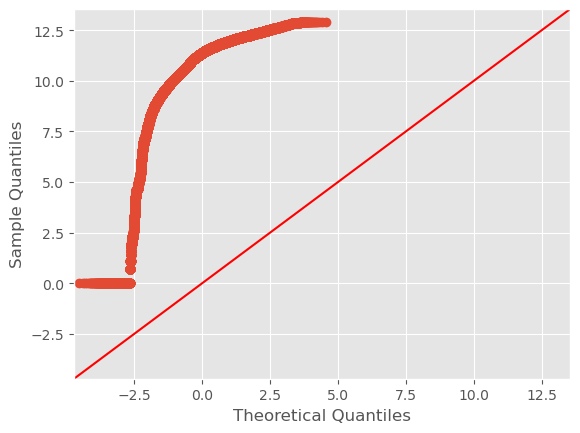

In [12]:
sm.qqplot(df['ln_odometer'], line ='45')

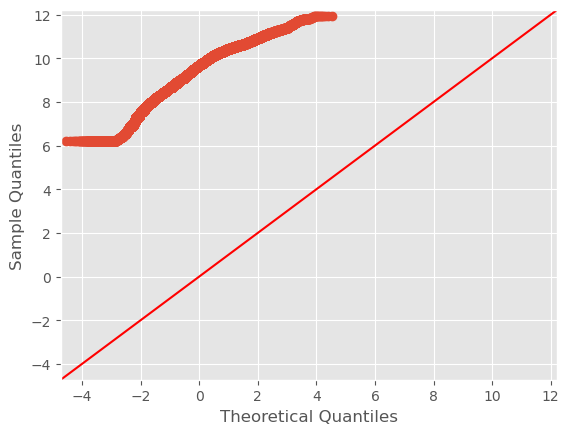

In [13]:
sm.qqplot(df['ln_price'], line ='45')

Claramente, elas não são distribuições normais. Como temos muitos dados e alguns outliers que fazem a distribuição ser assimétricas, vou assumir que elas tendem a normalidade dos dados e prosseguir com a regressão.
Após, vou testar a normalidade dos resíduos, que é pressuposto para o modelo linear clássico. Caso o teste falhe teremos que lidar com este problema de maneiras mais sofisticadas.

# Análise de correlação

O objetivo dessa primeira parte da análise é identificar alguma relação causal de interesse. A primeira pergunta que devemos nos fazer é se existe alguma associação entre as variáveis e, em caso positivo, qual a extensão dessa associação. Essa pergunta é respondida através da análise de correlação. Três aspectos podem ser analisados: (i) o sinal da associação ou covariação - se as variáveis se deslocam na mesma direção ou em direção oposta (ii) a robustez da associação e (iii) a linearidade da associação.
O coeficiente de correlação permite calcular a direção e o grau de associação entre as variáveis. A covariância dos desvios padronizados é chamado de coeficiente de correlação de Pearson.Este coeficiente é a medida mais utilizada para a verificação preliminar da relação entre duas variáveis. 
O problema é que o coeficiente de correlação de Pearson é sensível à presença de outliers. Podemos utilizar o Spearman's Rho, que não requer que os dados apresentam distribuição normal.
O Spearman's Rho mede o grau da relação monotônica entre duas variáveis. Entretanto, o Spearman's Rho apenas mede a correlação de variáveis contínuas. 

## Correlação de variáveis númericas

### Correlação de Spearman's Rho

In [6]:
selected_columns = ['ln_price', 'ln_odometer', 'year'] 
df[selected_columns].corr(method="spearman")


,ln_price,ln_odometer,year
ln_price,1.000000,-0.626834,0.697134
ln_odometer,-0.626834,1.000000,-0.692874
year,0.697134,-0.692874,1.000000


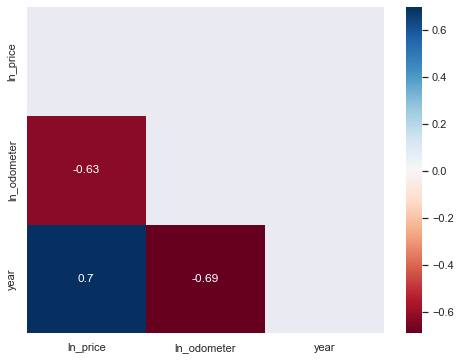

In [7]:
mask = np.triu(np.ones_like(df[selected_columns].corr(method="spearman"), dtype=bool))
sns.set(rc = {'figure.figsize':(8, 6)})
sns.heatmap(df[selected_columns].corr(method="spearman"), mask=mask,  annot=True, cmap='RdBu')
plt.show()

- Podemos ver que `ln_odometer` e `ln_price` estão correlacionados de maneira negativa, de forma forte. Isso indica que quanto maior o valor do odomêtro menor o  preço.
- O preço e o ano está correlacionado positivamente, de forma forte. Isso significa que as duas variáveis se movem juntas, indicando que o preço tende a aumentar conforme o ano do carro for mais novo, o que faz sentido já que carros com anos mais altos devem ser mais novos.
- Existe uma correlação negativa forte entre ln_odometer e year. Isso indica que  em geral, carros mais recentes tendem a ter uma quilometragem menor registrada - novamente eles são provavelmente mais novos.

Existem situações em que o coeficiente de correlação entre duas variáveis é elevado, mas na realidade, não existe relação causal entre as variáveis. Após análise estatística cuidadosa com medidas de dispersão, correlação e normalidade tudo parece indicar que não encontraremos nenhum resultado entre o preço do carro e a quantidade de quilômetros rodados. 

Ao longo da análise exploratória eu refleti sobre a correlação entre algumas das variáveis categóricas e o  odômetro. É importante entender como elas se correlacionam para evitar problemas de colineariedade. Entretanto, há pouca coisa escrita sobre como relacionar variáveis contínuas e categóricas. Felizmente, encontrei um post no [Medium](https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365) que detalha como fazer esse procedimento, o qual seguirei nesse projeto. O texto ressalta que uma das maneiras para testar correlação entre variáveis categóricas e contínuas, em que não temos uma distribuição normal é através da estimativa da variância da variável contínua, que pode ser explicada pela variável categórica.Para isso utilizaremos o teste de Kruskal-Wallis que é robusto e não precisa da normalidade dos resíduos.

In [46]:
df['condition'].value_counts()

good         115201
excellent    110146
new           54820
like new      40066
fair          22592
salvage       13441
Name: condition, dtype: int64

In [49]:
group1 = df[df['condition'] == 'good']['odometer']
group2 = df[df['condition'] == 'excellent']['odometer']
group3 = df[df['condition'] == 'new']['odometer']
group4 = df[df['condition'] == 'like new']['odometer']
group5 = df[df['condition'] == 'fair']['odometer']
group6 = df[df['condition'] == 'salvage']['odometer']


In [50]:
statistic, p_value = stats.kruskal(group1, group2, group3, group4, group5, group6)


In [53]:
p_value

0.0

In [51]:
if p_value < 0.05:
    print("Existe uma correlação significativa entre odometer e condition.")
else:
    print("Não existe uma correlação significativa entre odometer e condition.")


Existe uma correlação significativa entre odometer e condition.


In [85]:
group_1 = df[df['condition'] == 'good']['ln_price']
group_2 = df[df['condition'] == 'excellent']['ln_price']
group_3 = df[df['condition'] == 'new']['ln_price']
group_4 = df[df['condition'] == 'like new']['ln_price']
group_5 = df[df['condition'] == 'fair']['ln_price']
group_6 = df[df['condition'] == 'salvage']['ln_price']

statistic_, p_value_ = stats.kruskal(group_1, group_2, group_3, group_4, group_5, group_6)


if p_value_ < 0.05:
    print("Existe uma correlação significativa entre ln_price e condition.")
else:
    print("Não existe uma correlação significativa entre ln_price e condition.")

Existe uma correlação significativa entre ln_price e condition.


Talvez seja uma boa ideia rodar um modelo sem `condition`

# Ajeitando as variáveis categóricas
Antes de prosseguir com a regressão linear, iremos melhorar nosso dataset para análise:

1. Primeiro, irei eliminar as variáveis  `region` e `price`, visto que elas possuem a mesma informação que outras colunas no dataset e poderiam gerar problemas de colineariedade dos dados. 
2. Irei diminuir algumas categorias das variáveis categoricas, por questões de memória computacional, já que todas as variáveis categóricas virarão dummies.

    2.1 Irei categorizar os estados por macro regiões.
    
    2.2 Na variável `manufacturer` irei colocar todas as categorias que correspondem a menos de 1% do do dataset em `others`.
3. Irei dropar a variável `model` pois ela possui alta cardinalidade, o que pode levar a problemas de dimensionamento e complexidade computacional. Uma outra alternativa para lidar com elas em análise posterior seria realizar um PCA num pre-processamento dos dados.
4. Irei fazer dummies para todas a variáveis categóricas. Uma das variáveis será eliminada, novamente com o objetivo de evitar colineariedade dos dados.

### 1. Dropando algumas variáveis

In [55]:
df = df.drop(columns=['region', 'price'])

### Diminuindo categorias
#### Estados em macro regiões

As regiões aqui foram designadas segundo a divisão regional utilizada pelo United States Census Bureau:
- Região 1 (Nordeste)
    - Divisão 1 (Nova Inglaterra): Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut
    - Divisão 2 (Meio Atlântico): Nova Iorque, Pensilvânia, Nova Jersey
- Região 2 (Centro-Oeste) 
    - Divisão 3 (Leste Centro-Norte): Wisconsin, Michigan, Illinois, Indiana, Ohio
    - Divisão 4 (Oeste Centro-Norte): Missouri, Dakota do Sul, Dakota do Norte, Nebraska, Kansas, Minnesota, Iowa
- Região 3 (Sul):
    - Divisão 5 (Estados do Atlântico Sul): Delaware, Maryland, Distrito de Colúmbia, Virgínia, Virgínia Ocidental, Carolina do Norte, Carolina do Sul, Geórgia, Flórida
    - Divisão 6 (Estados do Leste Centro-Sul): Kentucky, Tennessee, Mississippi, Alabama
    - Divisão 7 (Estados do Oeste Centro-Sul): Oklahoma, Texas, Arkansas, Louisiana
- Região 4 (Oeste)
    - Divisão 8 (Mountain States): Idaho, Montana, Wyoming, Nevada, Utah, Colorado, Arizona, Novo México
    - Divisão 9 (Pacific States): Califórnia, Oregon, Washington, Alasca, Havaí

In [56]:
estados_nordeste = ['me', 'nh','vt','ma', 'ri', 'ct', 'ny', 'pa', 'nj']
nordeste = 'nordeste'

estados_centro_oeste = ['wi', 'mi', 'il', 'in', 'oh', 'mo', 'sd', 'nd', 'ne', 'ks', 'mn', 'ia']
centro_oeste = 'centro oeste'

estados_sul = ['de', 'md', 'va', 'wv', 'nc', 'sc', 'ga', 'fl', 'ky', 'tn', 'ms', 'al', 'ok', 'tx', 'ar', 'la', 'dc']
sul  = 'sul'

estados_oeste = ['id', 'mt', 'wy', 'nv', 'ut', 'co', 'az', 'nm', 'ca', 'or', 'wa', 'ak', 'hi']
oeste = 'oeste'

In [57]:
df['state'] = df['state'].replace(estados_nordeste, nordeste)
df['state'] = df['state'].replace(estados_centro_oeste, centro_oeste)
df['state'] = df['state'].replace(estados_sul, sul)
df['state'] = df['state'].replace(estados_oeste, oeste )

In [58]:
df['state'].value_counts()

sul             112083
oeste           106412
centro oeste     80600
nordeste         57171
Name: state, dtype: int64

#### Manufacturer

Irei colocar todas as categorias que correspondem a menos de 1% do do dataset em `others`. 

In [59]:
#número de categorias unicas na coluna manufacturer
df['manufacturer'].nunique()

41

In [60]:
df['manufacturer'].value_counts(normalize=True)

ford               0.172001
chevrolet          0.132721
toyota             0.084443
honda              0.053308
nissan             0.046145
jeep               0.045949
ram                0.042423
gmc                0.041127
bmw                0.036765
dodge              0.031519
mercedes-benz      0.027145
hyundai            0.025001
subaru             0.024207
volkswagen         0.023322
lexus              0.020889
kia                0.020190
audi               0.019354
cadillac           0.017403
acura              0.015399
chrysler           0.015011
buick              0.013852
mazda              0.013549
infiniti           0.012193
lincoln            0.010924
volvo              0.008606
mitsubishi         0.008165
mini               0.006108
pontiac            0.005917
jaguar             0.005151
rover              0.004600
porsche            0.003405
saturn             0.002900
mercury            0.002880
alfa-romeo         0.002380
tesla              0.002290
fiat               0

In [61]:
carros = ['volvo', 'mitsubishi', 'mini', 'pontiac', 'jaguar', 'rover', 'porsche', 'saturn', 'mercury', 'alfa-romeo', 'tesla', 'fiat', 'harley-davidson', 'datsun', 'ferrari', 'aston-martin', 'land rover']
others = 'others'
df['manufacturer'] = df['manufacturer'].replace(carros, others)


In [62]:
df['manufacturer'].nunique()

25

In [63]:
df['manufacturer'].value_counts(normalize=True)

ford             0.172001
chevrolet        0.132721
toyota           0.084443
others           0.055161
honda            0.053308
nissan           0.046145
jeep             0.045949
ram              0.042423
gmc              0.041127
bmw              0.036765
dodge            0.031519
mercedes-benz    0.027145
hyundai          0.025001
subaru           0.024207
volkswagen       0.023322
lexus            0.020889
kia              0.020190
audi             0.019354
cadillac         0.017403
acura            0.015399
chrysler         0.015011
buick            0.013852
mazda            0.013549
infiniti         0.012193
lincoln          0.010924
Name: manufacturer, dtype: float64

### Lidando com a `model`

In [64]:
df = df.drop(columns=['model'])

### Dummies

agora vamos criar as dummies

In [65]:
columns = ['manufacturer',  'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']


In [66]:
df_dummy = pd.get_dummies(df, columns = columns, drop_first=True)

In [67]:
df_dummy

,year,odometer,ln_price,ln_odometer,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,...,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_nordeste,state_oeste,state_sul
0,2013.0,128000.0,9.615805,11.759786,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2012.0,68696.0,10.239603,11.137446,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2016.0,29499.0,10.451320,10.292112,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,2019.0,43000.0,10.463103,10.668955,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,2016.0,17302.0,10.308619,9.758577,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356261,2019.0,32226.0,10.068578,10.380529,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
356262,2020.0,12029.0,10.328428,9.395076,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
356263,2020.0,4174.0,10.462818,8.336630,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
356264,2018.0,30112.0,10.274706,10.312679,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


# Análise econométrica

A identificação de uma relação de causalidade entre duas variáveis de interesse pode ser representada através de uma equação, onde y (ln_price) é a variável dependente - o fenômeno que desejamos analisar - e x são as variáveis explicativas, que provoca variações em y. A análise dos betas é feita da seguinte maneira: tudo o mais constante, a variação na variável $x_j$ gera um impacto de $B_j$ na variável dependente.
Embora estejamos interessados em saber quanto a quilometragem afeta o preço do carro, outras variáveis também podem influenciar no preço final passado ao consumidor. Por isso as incluímos na regressão, de modo que possam servir como controle.

obs: em todos os modelos irei utilizar o MQO robusto para heterocedasticidade. A presença de heterocedasticidade é uma violação dos pressupostos do modelo linear clássico, mas sua presença é muito comum. Por isso preferi utilizar as regressões robustas.

## Modelo 1: Log-log

$$ ln\_price = \beta_0 + \beta_1 ln\_odometer + \beta_{carro}caracteristicas\_carro + u$$

Em que $\beta_{carro}$ correspondem  a 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state'
Nosso modelo é um caso de modelo log-log, ou modelo de elasticidade constante, em que $\beta_1$ é a elasticidade de y em relação a x, ou seja, a variação percentual de y dado uma variação percentual em x. 



In [68]:
y = df_dummy['ln_price']
X = df_dummy.drop(columns=['ln_price', 'odometer'], axis=1)


In [70]:
X = sm.add_constant(X)

In [78]:
modelo_1 = sm.OLS(y,X)
results = modelo_1.fit(cov_type='HC1')
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     6484.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:11:34   Log-Likelihood:            -3.2511e+05
No. Observations:              356266   AIC:                         6.504e+05
Df Residuals:                  356188   BIC:                         6.512e+05
Df Model:                          77                                         
Covariance Type:                  HC1                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

- O coeficiente de `ln_odometer` é a elasticidade do preço em relação ao odomêtro. Assim, quando o odomêtro aumenta em 1% o preço cai em 0.0885%, mantendo-se tudo o mais constante.
- O carro ser do modelos audi, lincoln, mercedes-benz aumentam o preço, enquanto todos os outros modelos diminuem.
- Quando o carro tem a condição de `fair` ou `good` seu preço diminue em 51% e 10%, respectivamente. Enquanto, ser like_new e new tem relação positiva com preço (aumento de 7% e 27% respectivamente).

- A coluna P>|t| indica o p-valor para cada um dos coeficientes estimados. Dado o valor da estatística t, o p-valor informa qual o menor nível de significância ao qual a hipótese nula seria rejeitada (H0: o coeficiente é igual a zero). Um pequeno valor de p fornece evidência contra a hipótese nula. Portanto, os coeficientes com valores de p abaixo de 0,05 são considerados estatisticamente significativos. Esse é o caso de todas as variáveis analisadas acima.

- O R-quadrado é uma medida da proporção da variabilidade na variável dependente (ln_price) que é explicada pelo modelo. Nesse caso, o valor é 0,540, o que significa que cerca de 54% da variabilidade em ln_price é explicada pelas variáveis independentes incluídas no modelo.

- A estatística F global da regressão testa a hipótese conjunta sobre todos os parâmetros: $H_0: \beta_1 = \beta_2 =...\beta_j = 0$, ou seja é um teste de restrições lineares múltiplas. A estatística F assume assume que os erros sejam homocedásticos. De forma similar ao p-valor da estatística t, o p-valor da estatística F informa qual o menor nível de significância ao qual a hipótese nula seria rejeitada. Na tabela, a p-valor da estatística F é igual a zero, rejeitando a hipótese nula de que todos os parâmetros sejam simultaneamente iguais a zero.

- Tanto o AIC e BIC são critérios de seleção de modelo que penalizam modelos mais complexos. Quanto menor o valor do AIC e do BIC, melhor o modelo em termos de ajuste e parcimônia.Valores significativos nesses testes podem indicar violações das suposições do modelo. Os números aqui são muito altos, o que poderia indicar que há algum problema de multicolieariedade. Uma hipótese é que a variável `year` tenha alta colineariedade com a condição do carro, visto que carros de anos mais novos serão categorizados como novos ou seminovos. Por isso, refiz o modelo sem a variável `year`:

In [79]:
# sem variável ano
X_modelo1_2 = df_dummy.drop(['ln_price', 'year', 'odometer'], axis=1)
X_modelo1_2 = sm.add_constant(X_modelo1_2)


In [86]:
modelo_1_2 = sm.OLS(y,X_modelo1_2)
results_modelo_1_2 = modelo_1_2.fit(cov_type='HC1')
print(results_modelo_1_2.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     4725.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:22:12   Log-Likelihood:            -3.6137e+05
No. Observations:              356266   AIC:                         7.229e+05
Df Residuals:                  356189   BIC:                         7.237e+05
Df Model:                          76                                         
Covariance Type:                  HC1                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Houve melhora no modelo, que agora não apresenta mais colineariedade. Perdemos um pouco de potencial explicativo: Antes o R-2 indicava que cerca de 54% da variabilidade em ln_price é explicada pelas variáveis independentes incluídas no modelo, e agora esse valor é de apenas 43%. Ainda assim, é necessário ter essa perca para ter um modelo mais robusto.

Agora a quilometragem explica mais o preço: o aumento do odômetro em 1% diminui o preço em 0.1183%, tudo mais constante.
Como conseguimos eliminar o problema de colineariedade desse primeiro caso, continuaremos nossa análise sem o ano.

## Modelo 2: log-nivel

$$ ln\_price = \beta_0 + \beta_1 odometer + \beta_{carro}caracteristicas\_carro + u$$

In [82]:
y = df_dummy['ln_price']
X_modelo2 = df_dummy.drop(['ln_price', 'year', 'ln_odometer'], axis=1)
X_modelo2 = sm.add_constant(X_modelo2)


In [84]:
modelo_2 = sm.OLS(y,X_modelo2)
results_modelo_2 = modelo_2.fit(cov_type='HC1')
print(results_modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     6858.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:14:27   Log-Likelihood:            -3.2784e+05
No. Observations:              356266   AIC:                         6.558e+05
Df Residuals:                  356189   BIC:                         6.567e+05
Df Model:                          76                                         
Covariance Type:                  HC1                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Nesse modelo, voltamos a ter problemas com colineariedade, mesmo após eliminar a variável `year`.Como vimos na EDA, outra varíavel que possui forte correlação com odometro e preço é condition. Elimanaresmo ela.

In [89]:
# sem variável ano e condition
X_modelo2_2 = df_dummy.drop(['ln_price', 'year', 'ln_odometer', 'condition_fair', 'condition_good', 'condition_like new',
       'condition_new', 'condition_salvage'], axis=1)
X_modelo2_2 = sm.add_constant(X_modelo2_2)
modelo_2_2 = sm.OLS(y,X_modelo2_2)
results_modelo_2_2 = modelo_2_2.fit(cov_type='HC1')
print(results_modelo_2_2.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     7129.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:23:32   Log-Likelihood:            -3.3025e+05
No. Observations:              356266   AIC:                         6.606e+05
Df Residuals:                  356194   BIC:                         6.614e+05
Df Model:                          71                                         
Covariance Type:                  HC1                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Continuamos com problema de colineariedade. Análises mais profundas serão necessárias, caso quissesemos continuar com esse modelo.

## Modelo 3: log-nivel com termo quadratico

$$ ln\_price = \beta_0 + \beta_1 odometer + \beta_2 odometer^2 + \beta_{carro}caracteristicas\_carro + u$$

- Iremos adicionar o termo quadrático no terceiro modelo.

In [90]:
df_dummy['odometer_squared'] = df_dummy['odometer'] ** 2

In [91]:
y = df_dummy['ln_price']
X_modelo3 = df_dummy.drop(['ln_price', 'year', 'ln_odometer'], axis=1)
X_modelo3 = sm.add_constant(X_modelo3)
modelo_3 = sm.OLS(y,X_modelo3)
results_modelo_3 = modelo_3.fit(cov_type='HC1')
print(results_modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     3286.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:25:27   Log-Likelihood:            -3.2702e+05
No. Observations:              356266   AIC:                         6.542e+05
Df Residuals:                  356188   BIC:                         6.550e+05
Df Model:                          77                                         
Covariance Type:                  HC1                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

c:\Users\SAMSUNG\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 77, but rank is 76
  warnings.warn('covariance of constraints does not have full '


## Modelo 4: log-log com termo quadratico

$$ ln\_price = \beta_0 + \beta_1 ln_odometer + \beta_2 ln_odometer^2 + \beta_{carro}caracteristicas\_carro + u$$

In [92]:
df_dummy['ln_odometer_squared'] = df_dummy['ln_odometer'] ** 2

In [94]:
y = df_dummy['ln_price']
X_modelo4 = df_dummy.drop(['ln_price', 'year', 'odometer', 'odometer_squared'], axis=1)
X_modelo4 = sm.add_constant(X_modelo4)
modelo_4 = sm.OLS(y,X_modelo4)
results_modelo4 = modelo_4.fit(cov_type='HC1')
print(results_modelo4.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     5955.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:26:59   Log-Likelihood:            -3.3340e+05
No. Observations:              356266   AIC:                         6.669e+05
Df Residuals:                  356188   BIC:                         6.678e+05
Df Model:                          77                                         
Covariance Type:                  HC1                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

- Com excessão do modelo 1 log-log sem variável `year`, todos sofrem de problemas de colineariedade nos dados. Iremos escolher o melhor modelo com os testes a seguir.

## Checando as hipotéses do modelo de regressão linear

As hipóteses têm um papel importante na análise de relações de causalidade: como não temos todo o universo para trabalhar e nem sempre é possível obter dados a partir de experimentos controlados, utilizamos amostras aleatórias supostamente representativas do universo que estamos estudando. Desta forma, as hipóteses permitem que a interpretação dos resultados seja extrapolada de forma ampla e generalizada, e garantem que as propriedades dos estimadores de MQO serão mantidas. Logo, caso elas sejam respeitadas  teremos um modelo não viesado, eficiente e consistente. As principais premissas são:

1. **Hipótese 1**: As variáveis independentes e o termo de erro são não correlacionados -> caso essa hipótese seja violada, temos problemas de endogeneidade e os estimadores de MQO serão viesados e incosistentes.
2. **Hipótese 2**: Colineariedade não perfeita entre as variáveis independentes. A hipótese requer que nenhum dos regressores seja uma função linear perfeita dos outros regressores -> caso seja quebrada temos um problema de multicolineariedade e os estimadores do MQO são ineficientes.
3. **Hipótese 3**: Os termos de erro tem variância uniforme e não são correlacionados uns com os outros. Se a variável se altera com qualquer uma das variáveis explicativas, então temos heterocedasticidade -> Nesses casos os estimadores MQO são ineficientes, porém não viesados.
4. **Hipótese 4**: Os termos de erro são normalmente distribuídos. Quase nunca acontece, mas a Lei dos Grandes Números garante que, em uma grande amostra, o termo de erro apresenta distribuição que se aprocima da distribuição normal.



### Testes para problema com os regressores: multicolineariedade

A hipótese do modelo de regressão linear clássico diz que a colineariade entre as variáveis independentes não pode existir de forma perfeita. A colineariedade refere-se à situação em que duas variáveis independentes são fortemente correlacionadas,  enquanto a multicolinearidade é a situação em que há mais de duas variáveis explicativas com alto grau de correlação.
Embora problemas de multicolineariedade não gerem modelos viesados, a presença dela faz com que o modelo deixe de apresentar a menor variância possível e, portanto, o estimador de MQO perde em eficiência e maior sua probabilidade  de obter estimativas pontuais erráticas.

Vamos checar por multicolineariedade com o Teste Fator de Inflação da Variância (VIF).  O teste do Fator de Inflação de Variância fornece medidas de impacto da colineariedade entre as variáveis explicativas e o modelo de regressão sobre a precisão da estimativa. O menor valor do VIF é 1 e um valor maior do que 10 é indicação de problema potencial de multicolineariedade.

Utilizaremos uma função para calcular o VIF, retirada de um artigo do [Towards Data Science](https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b)

In [95]:
def compute_vif(dataset, considered_features):
    X = dataset[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable'] != 'intercept']
    return vif

In [96]:
features = X_modelo1_2.drop(['const'], axis=1)
considered_features = features.columns.tolist()
vif = compute_vif(X_modelo1_2, considered_features).sort_values('VIF', ascending=False)
vif


,Variable,VIF
34,cylinders_6 cylinders,80.901659
32,cylinders_4 cylinders,53.887224
35,cylinders_8 cylinders,49.156709
8,manufacturer_ford,10.655899
5,manufacturer_chevrolet,8.762418
...,...,...
44,title_status_rebuilt,1.017283
68,paint_color_purple,1.009400
45,title_status_salvage,1.007168
41,title_status_lien,1.003593


In [97]:
considered_features.remove('cylinders_6 cylinders')


In [98]:
vif_cylinders = compute_vif(X_modelo1_2, considered_features).sort_values('VIF', ascending=False)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_25524\3313468104.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


In [99]:
vif_cylinders

,Variable,VIF
8,manufacturer_ford,10.646493
5,manufacturer_chevrolet,8.762383
23,manufacturer_toyota,6.158866
20,manufacturer_others,4.453711
10,manufacturer_honda,4.362022
...,...,...
49,type_bus,1.008675
44,title_status_salvage,1.007167
30,cylinders_12 cylinders,1.003917
40,title_status_lien,1.003592


As variáveis que possuem alta colineariedade são as dummies de cylinders e a `manufacturer_ford`. A dos cilindros é muito maior do que o máximo que estamos permitindo (10). Isso indica que ela deveria ser tratada de uma maneira especial. Após a retirada do modelo, o problema com colieariedade na dummy de cilindros é resolvido.

Poderiamos lidar com essas dummies com alta colineariedade através de uma proxy ou combina-las em único índice. Isso pode ser feito em um trabalho posterior.

### Problemas com erro: Heterocedasticidade

O problema de heterocedasticidade acontece quando os termos de erro condicional das variáveis explicativas deixa de ser constante.A existência da heterocedasticidade não traz nenhuma implicação sobre a ausência de viés dos estimadores MQO e eles continuam não tendenciosos e consistentes. Mas as estatísticas t, F e LM deixam de ser válidas e temos que usar regressões robustas à heterocedasticidade.

O teste que usaremos aqui é o teste de Breusch-Pagan. A ideia básica do teste é verificar se termos de erro ao quadrado ($u^2$) está relacionado, em valor esperado, a uma ou mais variáveis independentes. A hipótese nula é:
$$ H_0: E(u^2|x_1, x_2, \ldots, x_k) = E(u^2) = \sigma^2$$

Se $H_0$ for falsa, o valor esperado de $u^2$, dadas as variáveis independentes, pode ser qualquer função de $x_j$

Como nunca conheceremos de fato os erros no modelo populacional, utilizamos as estimativas dos erros, os resíduos do MQO. Se o p-valor for suficientemente pequeno então rejeita-se a hipótese nula de homocedasticidade. Caso contrário, não podemos rejeitar a hipótese de homocedasticidade e temos erros heterocedásticos.

In [104]:
def perform_breusch_pagan_test(X):
    residuals = X.resid
    name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
    bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, X.model.exog)
    bp_test_result = lzip(name, bp_test)
    return bp_test_result

In [105]:
bp_test_result_1 = perform_breusch_pagan_test(results_modelo_1_2)
bp_test_result_2 = perform_breusch_pagan_test(results_modelo_2)
bp_test_result_3 = perform_breusch_pagan_test(results_modelo_3)
bp_test_result_4 = perform_breusch_pagan_test(results_modelo_4)

print(f'Resultado log-log:', bp_test_result_1)
print(f'Resultado log-nivel:', bp_test_result_2)
print(f'Resultado nivel-nivel quadratico:', bp_test_result_3)
print(f'Resultado log-log quadratico:', bp_test_result_4)


Resultado log-log: [('Lagrange multiplier statistic', 26021.682961435086), ('p-value', 0.0), ('f-value', 369.2894828618754), ('f p-value', 0.0)]
Resultado log-nivel: [('Lagrange multiplier statistic', 13914.507312537402), ('p-value', 0.0), ('f-value', 190.48576155640865), ('f p-value', 0.0)]
Resultado nivel-nivel quadratico: [('Lagrange multiplier statistic', 14562.215575099131), ('p-value', 0.0), ('f-value', 197.13612972774752), ('f p-value', 0.0)]
Resultado log-log quadratico: [('Lagrange multiplier statistic', 17082.582831214266), ('p-value', 0.0), ('f-value', 232.97401421521542), ('f p-value', 0.0)]


Por o p-valor ser baixo (0.0), temos evidências suficientes para rejeitar a hipótese nula e concluir que há heteroscedasticidade presente. Isso se repete em todos os modelos testados.

### Problemas com os regressores: testes de especificação e endogeneidade

Estatísticamente, podemos realizar alguns tipos de teste que permitem identificar se o modelo escolhido apresenta ou não algum problema de erro de especificação de forma funcional. Neste trabalho usaremos o teste de erro de especificação da regressão de Ramsey (RESET), que também se mostra bastante poderoso para detecção de não lineariedade.

A intuição do teste é de que, se existem erros de especificação, a hipótese média condicional do termo de erro deixa de ser satisfeita. Se isso ocorre, nenhuma função não linear das variáveis idependentes deve ser significante quando adicionada ao modelo original. Portanto, para realizar o teste RESET temos que decidir quantas funções dos valores estimados devem ser incluídas na regressão. 

A hipótese nula é que nossa equação original está corretamente especificada. Portanto, a estatística do teste RESET é a estatística F para testar $H_0: \sigma_1 = 0, \sigma_2 = 0$ no nosso modelo expandido com as novas funções dos valores estimados. Uma estatística F significante sugere algum tipo de problema na forma funcional.




In [106]:
def ramsey_reset_test(model, model_name):
    reset_test = linear_reset(model, power=2, test_type='fitted', use_f= True, cov_type ='HC1' )
    print('==='*20)
    print(f" Correct Functional Form Ramsey-RESET Test for {model_name} ")
    print(f"Model: {model_name}")
    print("Ramsey-RESET Test F-Statistic:", np.round(reset_test.fvalue, 6))
    print("Ramsey-RESET Test P-value:", np.round(reset_test.pvalue, 6))
    print('==='*20)

In [109]:
ramsey_reset_test(results_modelo_1_2, 'log-log')
ramsey_reset_test(results_modelo_2, 'log-nivel')
ramsey_reset_test(results_modelo_3, 'log-nivel quadratico')
ramsey_reset_test(results_modelo_4, 'log-log quadratico')

c:\Users\SAMSUNG\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


 Correct Functional Form Ramsey-RESET Test for log-log 
Model: log-log
Ramsey-RESET Test F-Statistic: 8102.914777
Ramsey-RESET Test P-value: 0.0
 Correct Functional Form Ramsey-RESET Test for log-nivel 
Model: log-nivel
Ramsey-RESET Test F-Statistic: 1114.296285
Ramsey-RESET Test P-value: 0.0
 Correct Functional Form Ramsey-RESET Test for log-nivel quadratico 
Model: log-nivel quadratico
Ramsey-RESET Test F-Statistic: 4430.428697
Ramsey-RESET Test P-value: 0.0
 Correct Functional Form Ramsey-RESET Test for log-log quadratico 
Model: log-log quadratico
Ramsey-RESET Test F-Statistic: 8987.905469
Ramsey-RESET Test P-value: 0.0


Todos nossos modelos rejeitam a hipótese nula, mesmo utilizando paramêtros de robustez. Para todos os modelos testados, os valores elevados das estatísticas F e os p-valores nulos indicam que há evidências significativas para rejeitar a hipótese nula de que os modelos estão corretamente especificados. 

Isso significa que temos uma má especificação no modelo. A má especificação do modelo pode acontecer se a relação entre a variável dependente e as variáveis independentes não forem lineares, as variáveis se relacionarem de forma iterativa e não de forma aditiva ou ainda de não termos considerados alguma variável relevante (problema de variável omitida). 

No caso de variável omitida, temos que os nossos dados não são suficiente para entender as relações de causalidade no modelo. A solução seria arranjar mais dados, ou utilizar alguma variável de proxy para eliminar ou reduzir este problema. Outra forma para resolver o problema de endogeneidade de uma ou mais variáveis explicativas é pelo uso de variáveis intrumentais. Todas essas opções iriam requerer um estudo mais aprofundando sobre o mercado de carros usados e da literatura de preços e demanda, talvez até consulta com especialistas.

O que podemos checar é a linearidade dos dados. Para detectar a não lineariedade, podemos observars os grafícos dos valores observados vs. ajustados ou ainda dos valores ajustados e resíduos. 

In [110]:
def plot_residuals(results, color='#5e548e'):
    # Cálculo dos resíduos
    residuos = results.resid
    
    # Gráfico de resíduos
    plt.scatter(results.fittedvalues, residuos, color=color)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Valores Previstos')
    plt.ylabel('Resíduos')
    plt.title('Gráfico de Resíduos')
    plt.show()

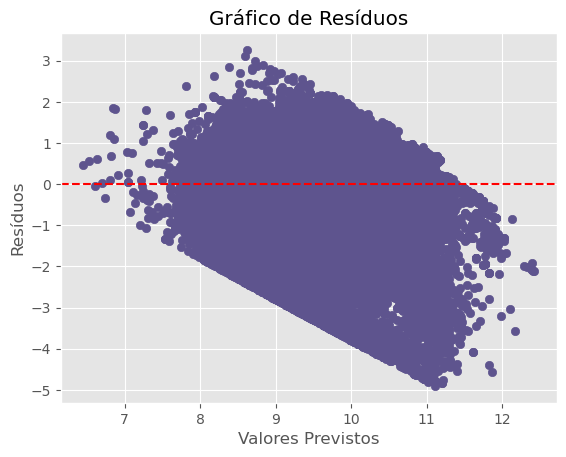

In [111]:
plot_residuals(results_modelo_1_2, color='#5e548e')


Nos outros modelos temos o mesmo padrão. 

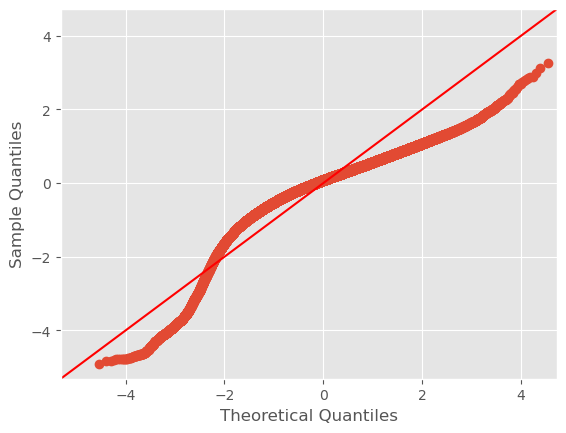

In [112]:
sm.qqplot(results_modelo_1_2.resid, line ='45')

Quando rodamos o teste de normalidade nos resíduos, vemos que eles se distanciam da linha vermelha. Mais uma violação do MQO.

O que podemos concluir com todo esse estudo é que os dados da maneira que temos aqui são insuficentes para conseguir encontrar alguma relação de causalidade entre preço e odomêtro. Talvez sejam necessários mais dados ou talvez devemos realizar alguma transformação nas variáveis, como um PCA, para tentar diminuir os problemas com colineariedade. Outra forma é utilizar regressões não paramétricas, para tentar melhorar o ajuste do modelo.

Outro passo que pode ser feito é realizar testes de estatística de influência.  Na presença de outliers, o MQO não reflete com precisão a relação estatística entre as variáveis, sendo um dos motivos para tal o fato de que outliers fazem com que a distribuição não seja normal. Os testes de influência permitem identificar essas observações e verificar como os resultados obtidos na regressão são sensíveis à sua presença. Esse dataset ainda contém diversos outliers, que podem estar prejudicando a performance do modelo. A aplicação desses testes e o tratamento de outliers podem gerar insights mais significativos.
